*OBS: O notebook abaixo não se trata de um projeto, mas de um estudo de caso para consolidar conhecimentos teóricos.

Bibliografia de suporte:
- Artificial Intelligence - A Modern Approach by Stuart Russell, Peter Norvig
- Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville

# Using PyTorch and TensorFlow in MNIST dataset

### Import the libraries

In [1]:
import numpy as np
import struct
from array import array
from os.path  import join
%matplotlib inline
import random
import matplotlib.pyplot as plt

## The block below is a data loader from the MNIST Project

In [2]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

## The block below is an example of the dataset

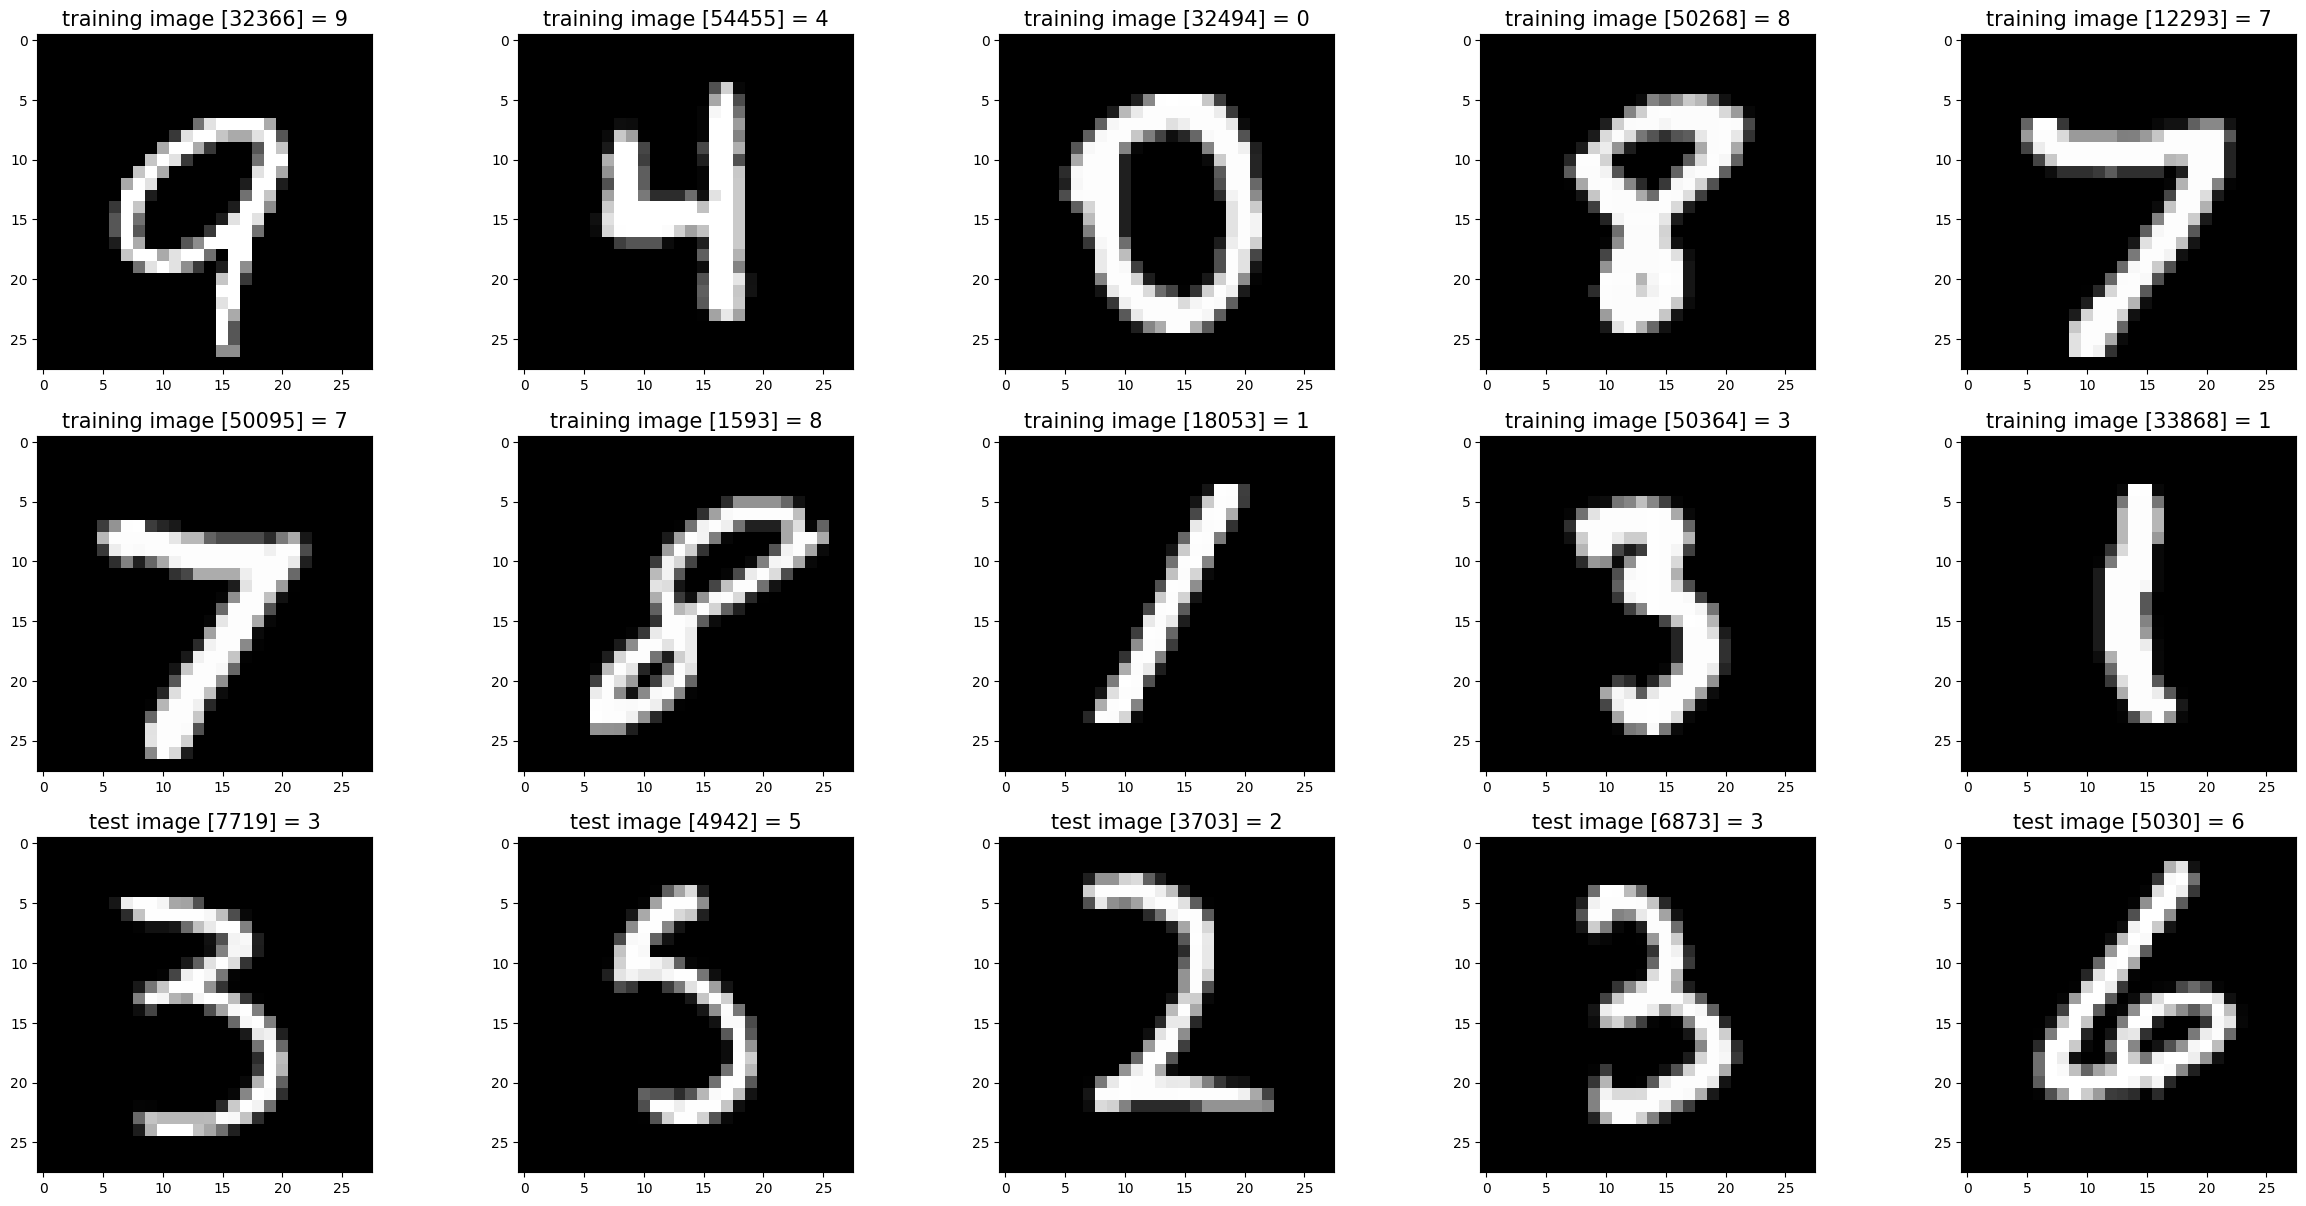

In [3]:
input_path = './archive'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

## Example of PyTorch application

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

- torch é a biblioteca principal do PyTorch.
- torch.nn contém classes e funções para criar redes neurais.
- torch.optim contém algoritmos de otimização, como o Adam.
- torchvision contém utilitários para visão computacional, incluindo datasets.
- torchvision.transforms contém funções para transformar dados.

In [7]:
input_size = 784 
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

Os hiperparâmetros são valores configuráveis que afetam o treinamento do modelo:

- input_size: Tamanho da entrada, que é 784 (28*28) pixels.
- hidden_size: Número de neurônios na camada oculta.
- num_classes: Número de classes (0-9 dígitos, então 10 classes).
- num_epochs: Número de vezes que o modelo verá todo o conjunto de treinamento.
- batch_size: Número de amostras processadas antes de atualizar os parâmetros do modelo.
- learning_rate: Taxa de aprendizado para o otimizador.

In [8]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Aqui, definimos as transformações a serem aplicadas aos dados:

- transforms.ToTensor(): Converte as imagens em tensores PyTorch.
- transforms.Normalize((0.5,), (0.5,)): Normaliza os dados para ter média 0 e desvio padrão 1.

In [9]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Aqui, carregamos o conjunto de dados MNIST:

- train_dataset e test_dataset carregam os dados de treinamento e teste respectivamente.
- DataLoader ajuda a iterar pelos dados em mini-batches, o que é útil para treinamento em GPUs.

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

Definimos uma rede neural simples com uma camada oculta:

- nn.Linear(input_size, hidden_size): Camada linear (totalmente conectada) com input_size entradas e hidden_size saídas.
- nn.ReLU(): Função de ativação ReLU (Rectified Linear Unit).
- self.fc2: Segunda camada linear com hidden_size entradas e num_classes saídas.

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

- nn.CrossEntropyLoss(): Função de perda que combina nn.LogSoftmax() e nn.NLLLoss().
- optim.Adam: Otimizador Adam, que é um método de descida de gradiente estocástico adaptativo.

In [12]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.5274
Epoch [1/5], Step [200/600], Loss: 0.3544
Epoch [1/5], Step [300/600], Loss: 0.3979
Epoch [1/5], Step [400/600], Loss: 0.1545
Epoch [1/5], Step [500/600], Loss: 0.1902
Epoch [1/5], Step [600/600], Loss: 0.1760
Epoch [2/5], Step [100/600], Loss: 0.2618
Epoch [2/5], Step [200/600], Loss: 0.0655
Epoch [2/5], Step [300/600], Loss: 0.0547
Epoch [2/5], Step [400/600], Loss: 0.0882
Epoch [2/5], Step [500/600], Loss: 0.2090
Epoch [2/5], Step [600/600], Loss: 0.1133
Epoch [3/5], Step [100/600], Loss: 0.1823
Epoch [3/5], Step [200/600], Loss: 0.1106
Epoch [3/5], Step [300/600], Loss: 0.0267
Epoch [3/5], Step [400/600], Loss: 0.0624
Epoch [3/5], Step [500/600], Loss: 0.1479
Epoch [3/5], Step [600/600], Loss: 0.2339
Epoch [4/5], Step [100/600], Loss: 0.1289
Epoch [4/5], Step [200/600], Loss: 0.0376
Epoch [4/5], Step [300/600], Loss: 0.0226
Epoch [4/5], Step [400/600], Loss: 0.0339
Epoch [4/5], Step [500/600], Loss: 0.1033
Epoch [4/5], Step [600/600], Loss:

Aqui, iteramos sobre os dados de treinamento:

- images.reshape(-1, 28*28): Redimensiona as imagens de 28x28 para 784 pixels.
- model(images): Faz uma previsão com o modelo.
- criterion(outputs, labels): Calcula a perda entre a previsão e o rótulo verdadeiro.
- optimizer.zero_grad(): Zera os gradientes acumulados.
- loss.backward(): Calcula os gradientes através da retropropagação.
- optimizer.step(): Atualiza os parâmetros do modelo com base nos gradientes calculados.

In [13]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10000 test images: 97.44%


- model.eval(): Coloca o modelo em modo de avaliação.
- torch.no_grad(): Desliga o cálculo de gradientes, economizando memória e aumentando a velocidade.
- correct e total: Contam o número de previsões corretas e o total de previsões.
- torch.max(outputs.data, 1): Obtém a classe com maior probabilidade.
- print(f'Accuracy...'): Calcula e imprime a acurácia do modelo no conjunto de dados de teste.

## Example of TensorFlow application

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

Aqui, estamos importando as bibliotecas necessárias:

- tensorflow é a biblioteca principal do TensorFlow.
- tensorflow.keras contém classes e funções para criar redes neurais de alto nível.

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Aqui, carregamos o conjunto de dados MNIST:

- mnist.load_data() carrega o conjunto de dados MNIST.
- x_train e x_test contêm as imagens de treinamento e teste, respectivamente.
- y_train e y_test contêm os rótulos de treinamento e teste, respectivamente.
- Dividimos os valores dos pixels por 255.0 para normalizar as imagens para a faixa [0, 1].

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

c:\Users\Pichau\miniconda3\envs\mnist_project\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Definimos uma rede neural simples com uma camada oculta:

- models.Sequential cria um modelo sequencial onde cada camada tem exatamente um tensor de entrada e um tensor de saída.
- layers.Flatten(input_shape=(28, 28)) transforma a entrada de uma matriz 2D (28x28 pixels) para um vetor 1D (784 pixels).
- layers.Dense(128, activation='relu') adiciona uma camada densa (totalmente conectada) com 128 unidades e função de ativação ReLU (Rectified Linear Unit).
- layers.Dense(10) adiciona uma camada densa com 10 unidades, uma para cada classe (0-9 dígitos).

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Compilamos o modelo para configurar o processo de aprendizado:

- optimizer='adam': Utiliza o otimizador Adam, que é um método de descida de gradiente estocástico adaptativo.
- loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): Define a função de perda como Cross-Entropy Categórica Esparsa, adequada para classificação multi-classe com rótulos inteiros.
- metrics=['accuracy']: Especifica que a métrica de avaliação será a acurácia.

In [20]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8787 - loss: 0.4262
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9646 - loss: 0.1201
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9771 - loss: 0.0773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9827 - loss: 0.0576
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0454


Treinamos o modelo com os dados de treinamento:

- x_train: Imagens de treinamento.
- y_train: Rótulos de treinamento.
- epochs=5: Número de épocas (quantas vezes o modelo verá todo o conjunto de treinamento).

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

313/313 - 0s - 946us/step - accuracy: 0.9788 - loss: 0.0718

Test accuracy: 0.98


Avaliamos o modelo com os dados de teste:

- x_test: Imagens de teste.
- y_test: Rótulos de teste.
- verbose=2: Nível de verbosidade do método de avaliação. 2 mostra uma barra de progresso e uma linha por época.
- print(f'\nTest accuracy: {test_acc:.2f}'): Imprime a acurácia do modelo no conjunto de dados de teste.

Explicação Adicional: 

Transformação Flatten
- layers.Flatten(input_shape=(28, 28)) é utilizada para converter cada imagem de uma matriz 2D de 28x28 pixels para um vetor 1D de 784 pixels. Isso é necessário porque a camada densa (Dense) espera um vetor 1D como entrada.

Camadas Densas (Dense Layers)
- layers.Dense(128, activation='relu'): Esta camada aplica uma transformação linear aos dados de entrada seguida por uma função de ativação ReLU. A ReLU (Rectified Linear Unit) é uma função de ativação popular que ajuda a introduzir não-linearidades no modelo.
- layers.Dense(10): A camada final aplica uma transformação linear para mapear os 128 neurônios da camada anterior para os 10 neurônios correspondentes às classes de dígitos (0-9).

Função de Perda e Otimizador
- SparseCategoricalCrossentropy: Esta função de perda é usada quando os rótulos são inteiros (não categóricos) e as previsões são logits (não normalizados).
- Adam: O otimizador Adam combina as vantagens do Adagrad e do RMSProp. É eficiente para grandes conjuntos de dados e problemas com muitos parâmetros.